In [11]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [12]:
import pandas as pd
from learning_analysis import learning_analysis
from bias_variance_analysis import bias_variance_analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV
from preprocess import *

In [13]:
# Read the preprocessed dataset
train = pd.read_csv('../dataset/train_preprocessed.csv')
X_train = train.drop('Body_Level', axis=1).to_numpy()
y_train = train['Body_Level'].to_numpy(dtype='int')

In [14]:
# Read the test dataset
test = pd.read_csv('../dataset/test.csv')
test = preprocess(test)
test = remove_uncorrelated_features(test)
X_test = test.drop('Body_Level', axis=1).to_numpy()
y_test = test['Body_Level'].to_numpy(dtype='int')

In [15]:
param_grid = {'penalty': ['l1', 'l2'], 
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'solver': ['liblinear', 'saga' , 'lbfgs' , 'newton-cg' , 'sag' , 'newton-cholesky']
              }

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score:  0.9774041009335127


In [16]:
# Fit the logistic regression model
model_architecture = LogisticRegression(C=100)

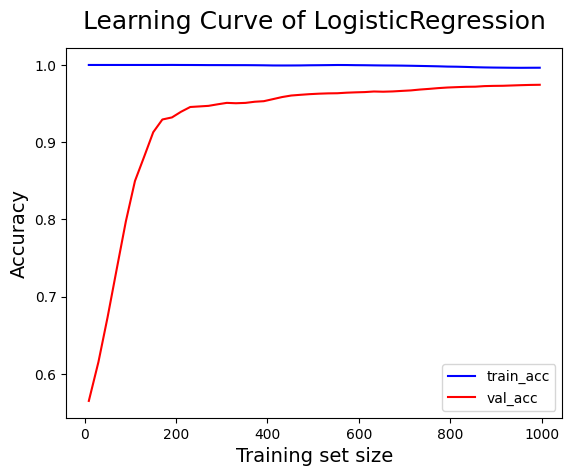

In [17]:
learning_analysis(model_architecture, X_train, y_train)

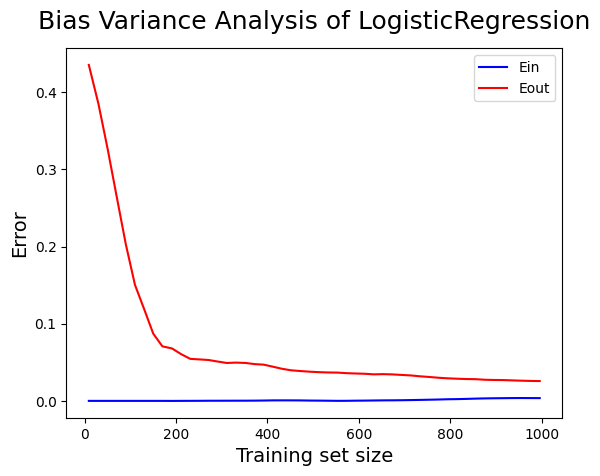

In [18]:
bias_variance_analysis(model_architecture, X_train, y_train)

In [19]:
# Fit the model
model = model_architecture.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc_roc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), average='weighted', multi_class='ovr')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('AUC-ROC:', auc_roc)

Accuracy: 0.9648648648648649
Precision: 0.9670600196744316
Recall: 0.9648648648648649
F1-score: 0.9651563268371319
AUC-ROC: 0.9796055796055796


In [20]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.85      1.00      0.92        40
           2       0.91      0.87      0.89        55
           3       0.99      0.95      0.97       100
           4       1.00      0.99      1.00       175

    accuracy                           0.96       370
   macro avg       0.94      0.95      0.94       370
weighted avg       0.97      0.96      0.97       370

